Downloaded a dummy FAQ Dataset from Hugging Face: https://huggingface.co/datasets/NebulaByte/E-Commerce_FAQs/tree/main


### Mounting gdrive to use it in the notebook

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as ss


pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sb.set(style="ticks", color_codes=True)

In [3]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
raw_data_path = '/content/drive/MyDrive/Colab Notebooks/workhuman/FAQs.csv'
data = pd.read_csv(raw_data_path)

In [5]:
data.head()

,parent_category,category_id,category,question_id,question,answer,faq_url,que_ans
0,NaN,55c9cf49b0000024002c1703,Order,55bf40a7d000003d0011ffa1,I missed the delivery of my order today. What ...,The courier service delivering your order usua...,https://www.flipkart.com/helpcentre?catalog=55...,I missed the delivery of my order today. What ...
1,NaN,55c9cf49b0000024002c1703,Order,55f2a6eb5b00001e003202ed,Will the delivery be tried again if I'm not ab...,Couriers make sure that the delivery is re-att...,https://www.flipkart.com/helpcentre?catalog=55...,Will the delivery be tried again if I'm not ab...
2,NaN,55c9cf49b0000024002c1703,Order,55f2a6995b00002b003202be,The delivery of my order is delayed. What shou...,On the rare occasion that your order is delaye...,https://www.flipkart.com/helpcentre?catalog=55...,The delivery of my order is delayed. What shou...
3,NaN,55c9cf49b0000024002c1703,Order,55f2a53f5c00003200342b9c,What should I do if my order is approved but h...,Sellers usually ship orders 1-2 business days ...,https://www.flipkart.com/helpcentre?catalog=55...,What should I do if my order is approved but h...
4,NaN,55c9cf49b0000024002c1703,Order,55e9455f5a00002500d5e024,Can I take the shipment after opening and chec...,"As per company policy, a shipment can't be ope...",https://www.flipkart.com/helpcentre?catalog=55...,Can I take the shipment after opening and chec...


<Axes: >

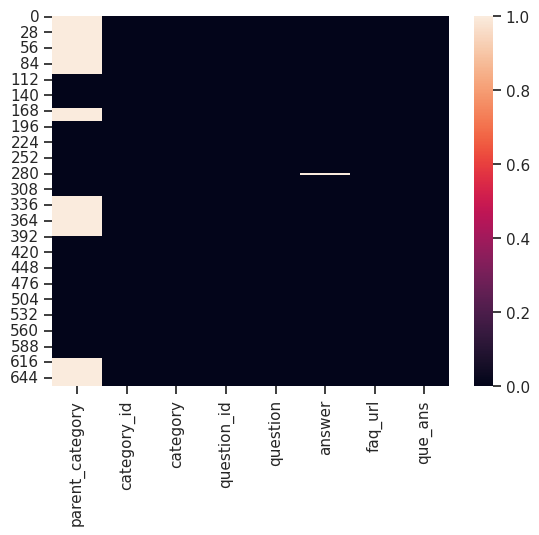

In [6]:
# Visualising missing data
sb.heatmap(data.isnull())

Lets figure out, if the missing data in `parent_category` column can be refilled by seeing if the data in this column has any correlation with other column as well.

In [7]:
numeric_data = data.select_dtypes(include=np.number)
categorical_data = data.select_dtypes(exclude=np.number)

In [8]:
numeric_data.head()

""
0
1
2
3
4


So, we dont have any numerical columns.

In [9]:
# Get count of unique values in each column
print(categorical_data.nunique())

parent_category      6
category_id         34
category            34
question_id        659
question           657
answer             624
faq_url            659
que_ans            659
dtype: int64


In [10]:
# Getting unique combination values between columns `parent_category` and `category`.
unique_combinations = categorical_data[["parent_category", "category"]].drop_duplicates()
unique_combinations

,parent_category,category
0,NaN,Order
30,NaN,Cancellations and Returns
59,NaN,Payment
102,Payment,Bajaj Finserv EMI
120,Payment,SBI Pre-approved loan
125,Payment,Credit Card No Cost EMI
144,Payment,Flipkart Axis Bank Credit Card
164,NaN,Shopping
186,NaN,Wallet
187,Wallet,PhonePe


The category column is very diverse and the missing values of `parent_category` can not be assumed.


Analyse the row where the value for `answer` column is empty.

In [13]:
empty_anwer_rows = categorical_data[categorical_data['answer'].isna()]
empty_anwer_rows.head()

,parent_category,category_id,category,question_id,question,answer,faq_url,que_ans
280,Insurance,5e8ee62b5100001a000600ec,Aegon Life Insurance,5e5cf88e49000032000a4465,Can I update/change the nominee details post purchasing the Aegon Life Group Term Plus Insurance Plan?,NaN,https://www.flipkart.com/helpcentre?catalog=5e8ee62b5100001a000600ec&faq=5e5cf88e49000032000a4465&view=FAQ,Can I update/change the nominee details post purchasing the Aegon Life Group Term Plus Insurance Plan?
281,Insurance,5e8ee62b5100001a000600ec,Aegon Life Insurance,5e5cf8161200001800126269,Can a minor be made a nominee as part of the Aegon Life Group Term Plus Insurance Plan?,NaN,https://www.flipkart.com/helpcentre?catalog=5e8ee62b5100001a000600ec&faq=5e5cf8161200001800126269&view=FAQ,Can a minor be made a nominee as part of the Aegon Life Group Term Plus Insurance Plan?


These two rows above can be deleted as the value for `answer` column is missing.

Look out for duplicate rows

In [15]:
duplicate_rows = categorical_data[categorical_data.duplicated()]
duplicate_rows

,parent_category,category_id,category,question_id,question,answer,faq_url,que_ans


Check for Duplicate Columns if any - Looking into the above rows, the columns `question` and `que_ans` seems to be duplicates. Lets verify it.

In [23]:
categorical_data.columns

Index(['parent_category', 'category_id', 'category', 'question_id', 'question',
       'answer', 'faq_url', 'que_ans'],
      dtype='object')

In [25]:
categorical_data[['question','que_ans']].head()

,question,que_ans
0,I missed the delivery of my order today. What should I do?,I missed the delivery of my order today. What should I do? The courier service delivering your order usually tries to deliver on the next business day in case you miss a delivery.\nYou can check your SMS for more details on when the courier service will try to deliver again.\n
1,Will the delivery be tried again if I'm not able to collect my order the first time?,Will the delivery be tried again if I'm not able to collect my order the first time? Couriers make sure that the delivery is re-attempted the next working day if you can't collect your order the first time.
2,The delivery of my order is delayed. What should I do?,"The delivery of my order is delayed. What should I do? On the rare occasion that your order is delayed, please check your email & messages for updates. A new delivery timeframe will be shared with you and you can also track its status by visiting My Orders.\n"
3,What should I do if my order is approved but hasn't been shipped yet?,What should I do if my order is approved but hasn't been shipped yet? Sellers usually ship orders 1-2 business days before the delivery date so that they reach you on time. In case your order hasn't been shipped within this time please contact our Customer Support so that we can look into it.
4,Can I take the shipment after opening and checking the contents inside?,"Can I take the shipment after opening and checking the contents inside? As per company policy, a shipment can't be opened before delivery, but you can accept the shipment and get in touch with us later in case you have any concerns."


In [18]:
duplicate_cols = categorical_data['question'].equals(categorical_data['que_ans'])
duplicate_cols

False

The column que_ans is redundant. This can be removed from the dataframe as well.

Following PREPROCESSING steps would have to be done.
*   We can drop the column `parent_category` as huge portion of data is already missing
*   `category_id` and `category` columns are similar and thus redundant. We can keep either of the two columns.
*   Remove the column que_ans as it is redundant, since the information is a concatenated string of `question` and `answer` columns.
*   Drop the rows with missing answers in `answer` column.
*   Look out for HTML tags in the columns [`question`, `answer`].
*   Conversion of Text to lower case can be done. But it is not suggested for a NLP use case, as words with upper case have a spatial significance and thus mean different as compared to small case words.
*   Search for special characters and get clean the data from special chars.



